In [6]:
# ! pip install kagglehub

In [16]:
# import kagglehub
# import os
# path = kagglehub.dataset_download("mohamedadlyi/aflw2000-3d")

# print("Path to dataset files:", path)

100%|██████████| 83.4M/83.4M [00:08<00:00, 10.7MB/s]

Extracting files...


Path to dataset files: /home/bryan_santosa/.cache/kagglehub/datasets/mohamedadlyi/aflw2000-3d/versions/1


In [17]:
# import shutil
# # Step 2: Move / copy to your desired folder
# dst_path = "../dataset/aflw2000-3d"
# os.makedirs(dst_path, exist_ok=True)

# shutil.copytree(path, dst_path, dirs_exist_ok=True)

# print("Dataset copied to:", dst_path)

Dataset copied to: ../dataset/aflw2000-3d


In [ ]:
# import sys
# import os

# ROOT_DIR = os.path.abspath("../")
# sys.path.append(ROOT_DIR)

In [37]:
print(f"inside utils")
for i in os.listdir("../utils"):
    print(f"../utils/{i}")
print(f"inside models")
for i in os.listdir("../models"):
    print(f"../models/{i}")
print(f"inside Faceboxes")
for i in os.listdir("../FaceBoxes"):
    print(f"../FaceBoxes/{i}")
print(f"inside configs")
for i in os.listdir("../Configs"):
    print(f"../Configs/{i}")
print(f"inside bfm")
for i in os.listdir("../bfm"):
    print(f"../bfm/{i}")

inside utils
../utils/asset
../utils/depth.py
../utils/functions.py
../utils/io.py
../utils/mtcnn_detector.py
../utils/onnx.py
../utils/pncc.py
../utils/pose.py
../utils/render.py
../utils/render_ctypes.py
../utils/scrfd_detector.py
../utils/serialization.py
../utils/tddfa_util.py
../utils/uv.py
../utils/__init__.py
../utils/__pycache__
inside models
../models/mobilenet_v1.py
../models/mobilenet_v3.py
../models/resnet.py
../models/__init__.py
../models/__pycache__
inside Faceboxes
../FaceBoxes/.gitignore
../FaceBoxes/build_cpu_nms.sh
../FaceBoxes/FaceBoxes.py
../FaceBoxes/FaceBoxes_ONNX.py
../FaceBoxes/models
../FaceBoxes/onnx.py
../FaceBoxes/readme.md
../FaceBoxes/utils
../FaceBoxes/weights
../FaceBoxes/__init__.py
../FaceBoxes/__pycache__
inside configs
../Configs/.gitignore
../Configs/bfm_noneck_v3.onnx
../Configs/bfm_noneck_v3.onnx.data
../Configs/bfm_noneck_v3.pkl
../Configs/BFM_UV.mat
../Configs/indices.npy
../Configs/mb05_120x120.yml
../Configs/mb1_120x120.yml
../Configs/ncc_cod

In [58]:
import yaml

def load_cfg(cfg_fp):
    with open(cfg_fp, "r") as f:
        return yaml.safe_load(f)


In [59]:

# from TDDFA import TDDFA
# from FaceBoxes import FaceBoxes

# cfg = load_cfg("../configs/mb1_120x120.yml")

# tddfa = TDDFA(gpu_mode=True, **cfg)
# face_boxes = FaceBoxes()


/mnt/d/Uni/Semester 5/Deep learning/Deep-LearningProject/utils/tddfa_util.py:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_fp, map_loc

In [65]:
import os
import cv2
import numpy as np
import torch

from FaceBoxes import FaceBoxes
from TDDFA import TDDFA
# from utils.render import render
# from utils.pose import viz_pose
# from utils.functions import draw_landmarks
# from utils.config import cfg
from utils.io import _load

# -------- CONFIG --------
IMAGE_DIR = "../dataset/aflw2000-3d/AFLW2000"
OUT_DIR = "data/landmarks"
os.makedirs(OUT_DIR, exist_ok=True)

device = "cuda" if torch.cuda.is_available() else "cpu"

# -------- LOAD MODELS --------
cfg = load_cfg("../configs/mb1_120x120.yml")

tddfa = TDDFA(gpu_mode=True, **cfg)
face_boxes = FaceBoxes()

import numpy as np

KEYPOINTS_FP = "../configs/indices.npy"
kp_idx = np.load(KEYPOINTS_FP)
# print(os.listdir(IMAGE_DIR))
print(kp_idx.shape)
# print(lm68.shape)


# -------- PROCESS IMAGES --------
# for img_name in os.listdir(IMAGE_DIR):
#     if not img_name.lower().endswith((".jpg", ".png")):
#         continue

#     img_path = os.path.join(IMAGE_DIR, img_name)
#     img = cv2.imread(img_path)

#     boxes = face_boxes(img)
#     if len(boxes) == 0:
#         continue

#     param_lst, roi_box_lst = tddfa(img, boxes)
#     ver_lst = tddfa.recon_vers(param_lst, roi_box_lst)

#     # Take first face only
#     verts = ver_lst[0]  # (3, N)
#     verts = verts.T     # (N, 3)

#     # Convert dense mesh to 68 landmarks
#     lm68 = verts[kp_idx]# predefined indices

#     out_path = os.path.join(OUT_DIR, img_name.replace(".jpg", ".npy"))
#     np.save(out_path, lm68)

#     print(f"Saved {out_path}")


(38365,)


In [68]:
! pip install mediapipe

  Using cached mediapipe-0.10.21-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
  Using cached jax-0.6.2-py3-none-any.whl.metadata (13 kB)
  Using cached jaxlib-0.6.2-cp310-cp310-manylinux2014_x86_64.whl.metadata (1.3 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached protobuf-4.25.8-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
  Using cached sounddevice-0.5.3-py3-none-any.whl.metadata (1.6 kB)
  Using cached sentencepiece-0.2.1-cp310-cp310-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (10 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
  Using cached opencv_contrib_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached mediapipe-0.10.21-cp310-cp310-manylinux

In [71]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import mediapipe as mp

from TDDFA import TDDFA
from FaceBoxes import FaceBoxes
from utils.tddfa_util import _parse_param

# ---------------------------
# Config
# ---------------------------
IMG_DIR = "../dataset/aflw2000-3d/AFLW2000"
OUT_DIR = "data"
os.makedirs(OUT_DIR, exist_ok=True)

# ---------------------------
# Init models
# ---------------------------
mp_face = mp.solutions.face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True
)

tddfa = TDDFA(
    gpu_mode=True,
    arch="mobilenet",
    checkpoint_fp="../weights/mb1_120x120.pth"
)

face_boxes = FaceBoxes()

# ---------------------------
# Storage
# ---------------------------
all_landmarks = []
all_expr = []

# ---------------------------
# Process images
# ---------------------------
for img_name in tqdm(os.listdir(IMG_DIR)):
    if not img_name.lower().endswith((".jpg", ".png")):
        continue

    img_fp = os.path.join(IMG_DIR, img_name)
    img = cv2.imread(img_fp)
    if img is None:
        continue

    h, w, _ = img.shape
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # MediaPipe landmarks
    results = mp_face.process(img_rgb)
    if not results.multi_face_landmarks:
        continue

    lm = results.multi_face_landmarks[0].landmark
    lm = np.array([[p.x * w, p.y * h, p.z * w] for p in lm]).flatten()
    all_landmarks.append(lm)

    # 3DDFA expression
    boxes = face_boxes(img)
    if len(boxes) == 0:
        all_landmarks.pop()
        continue

    param_lst, roi_box_lst = tddfa(img, [boxes[0]])
    _, _, _, alpha_exp = _parse_param(param_lst[0])
    all_expr.append(alpha_exp)

# ---------------------------
# Save
# ---------------------------
np.save(os.path.join(OUT_DIR, "landmarks.npy"), np.array(all_landmarks))
np.save(os.path.join(OUT_DIR, "expressions.npy"), np.array(all_expr))

print("Dataset created:")
print("Landmarks:", np.array(all_landmarks).shape)
print("Expressions:", np.array(all_expr).shape)


W0000 00:00:1765702277.242590   82905 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1765702277.267492   82904 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
100%|██████████| 4001/4001 [01:19<00:00, 50.09it/s] 


Dataset created:
Landmarks: (1828, 1434)
Expressions: (1828, 10, 1)


In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import torch
torch.set_grad_enabled(True)

# -------------------------------
# Config
# -------------------------------
DATA_DIR = "./data"
LANDMARKS_FP = os.path.join(DATA_DIR, "landmarks.npy")
EXPRESSIONS_FP = os.path.join(DATA_DIR, "expressions.npy")

BATCH_SIZE = 128
EPOCHS = 50
LR = 1e-3
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
SAVE_DIR = "checkpoints"
os.makedirs(SAVE_DIR, exist_ok=True)

# -------------------------------
# Dataset
# -------------------------------
class ExpressionDataset(Dataset):
    def __init__(self, lm_fp, exp_fp):
        self.X = np.load(lm_fp).astype(np.float32)
        self.y = np.load(exp_fp).astype(np.float32).squeeze(-1)

        assert self.X.shape[0] == self.y.shape[0]
        assert self.X.shape[1] == 478 * 3
        assert self.y.shape[1] == 10

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.from_numpy(self.X[idx]), torch.from_numpy(self.y[idx])

# -------------------------------
# Model
# -------------------------------
class ExpressionHead(nn.Module):
    def __init__(self):
        super().__init__()
        input_dim = 1434
        self.net = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(inplace=True),

            nn.Linear(256, 128),
            nn.ReLU(inplace=True),

            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.net(x)

# -------------------------------
# Training
# -------------------------------
def train():
    dataset = ExpressionDataset(LANDMARKS_FP, EXPRESSIONS_FP)
    loader = DataLoader(
        dataset,
        batch_size=BATCH_SIZE,
        shuffle=True,
        num_workers=4,
        pin_memory=True
    )

    model = ExpressionHead().to(DEVICE)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=LR)

    print(f"Training on {DEVICE}, samples: {len(dataset)}")

    for epoch in range(EPOCHS):
        model.train()
        total_loss = 0.0

        pbar = tqdm(loader, desc=f"Epoch {epoch+1}/{EPOCHS}")
        for x, y in pbar:
            x = x.to(DEVICE)
            y = y.to(DEVICE)

            pred = model(x)
            loss = criterion(pred, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            pbar.set_postfix(loss=loss.item())

        avg_loss = total_loss / len(loader)
        print(f"Epoch {epoch+1}: avg loss = {avg_loss:.6f}")

        # Save checkpoint
        torch.save(
            model.state_dict(),
            os.path.join(SAVE_DIR, f"expr_head_epoch{epoch+1}.pth")
        )

    torch.save(model.state_dict(), os.path.join(SAVE_DIR, "expr_head_final.pth"))
    print("Training complete!")

# -------------------------------
# Entry
# -------------------------------
if __name__ == "__main__":
    train()


Training on cuda, samples: 1828


Epoch 1/50: 100%|██████████| 15/15 [00:00<00:00, 24.19it/s, loss=0.0926]


Epoch 1: avg loss = 0.219442


Epoch 2/50: 100%|██████████| 15/15 [00:00<00:00, 39.53it/s, loss=0.0861]


Epoch 2: avg loss = 0.118588


Epoch 3/50: 100%|██████████| 15/15 [00:00<00:00, 35.50it/s, loss=0.0867]


Epoch 3: avg loss = 0.100219


Epoch 4/50: 100%|██████████| 15/15 [00:00<00:00, 40.30it/s, loss=0.0928]


Epoch 4: avg loss = 0.094839


Epoch 5/50: 100%|██████████| 15/15 [00:00<00:00, 43.60it/s, loss=0.136]


Epoch 5: avg loss = 0.090379


Epoch 6/50: 100%|██████████| 15/15 [00:00<00:00, 53.91it/s, loss=0.0749]


Epoch 6: avg loss = 0.075582


Epoch 7/50: 100%|██████████| 15/15 [00:00<00:00, 52.12it/s, loss=0.0917]


Epoch 7: avg loss = 0.077850


Epoch 8/50: 100%|██████████| 15/15 [00:00<00:00, 48.73it/s, loss=0.108] 


Epoch 8: avg loss = 0.077232


Epoch 9/50: 100%|██████████| 15/15 [00:00<00:00, 48.67it/s, loss=0.061] 


Epoch 9: avg loss = 0.076118


Epoch 10/50: 100%|██████████| 15/15 [00:00<00:00, 48.68it/s, loss=0.0853]


Epoch 10: avg loss = 0.076029


Epoch 11/50: 100%|██████████| 15/15 [00:00<00:00, 41.15it/s, loss=0.081]


Epoch 11: avg loss = 0.071592


Epoch 12/50: 100%|██████████| 15/15 [00:00<00:00, 54.58it/s, loss=0.0982]


Epoch 12: avg loss = 0.068484


Epoch 13/50: 100%|██████████| 15/15 [00:00<00:00, 48.63it/s, loss=0.0659]


Epoch 13: avg loss = 0.068748


Epoch 14/50: 100%|██████████| 15/15 [00:00<00:00, 51.38it/s, loss=0.0461]


Epoch 14: avg loss = 0.060562


Epoch 15/50: 100%|██████████| 15/15 [00:00<00:00, 47.05it/s, loss=0.0536]


Epoch 15: avg loss = 0.059811


Epoch 16/50: 100%|██████████| 15/15 [00:00<00:00, 54.25it/s, loss=0.0907]


Epoch 16: avg loss = 0.066790


Epoch 17/50: 100%|██████████| 15/15 [00:00<00:00, 41.74it/s, loss=0.0575]


Epoch 17: avg loss = 0.065264


Epoch 18/50: 100%|██████████| 15/15 [00:00<00:00, 37.66it/s, loss=0.0605]


Epoch 18: avg loss = 0.061073


Epoch 19/50: 100%|██████████| 15/15 [00:00<00:00, 43.92it/s, loss=0.0754]


Epoch 19: avg loss = 0.061512


Epoch 20/50: 100%|██████████| 15/15 [00:00<00:00, 48.17it/s, loss=0.145] 


Epoch 20: avg loss = 0.063360


Epoch 21/50: 100%|██████████| 15/15 [00:00<00:00, 49.30it/s, loss=0.0787]


Epoch 21: avg loss = 0.060960


Epoch 22/50: 100%|██████████| 15/15 [00:00<00:00, 49.06it/s, loss=0.0508]


Epoch 22: avg loss = 0.058586


Epoch 23/50: 100%|██████████| 15/15 [00:00<00:00, 50.78it/s, loss=0.0726]


Epoch 23: avg loss = 0.056472


Epoch 24/50: 100%|██████████| 15/15 [00:00<00:00, 43.52it/s, loss=0.0857]


Epoch 24: avg loss = 0.060799


Epoch 25/50: 100%|██████████| 15/15 [00:00<00:00, 56.17it/s, loss=0.118]


Epoch 25: avg loss = 0.061575


Epoch 26/50: 100%|██████████| 15/15 [00:00<00:00, 54.46it/s, loss=0.0753]


Epoch 26: avg loss = 0.059562


Epoch 27/50: 100%|██████████| 15/15 [00:00<00:00, 51.84it/s, loss=0.0929]


Epoch 27: avg loss = 0.058629


Epoch 28/50: 100%|██████████| 15/15 [00:00<00:00, 54.08it/s, loss=0.0722]


Epoch 28: avg loss = 0.057910


Epoch 29/50: 100%|██████████| 15/15 [00:00<00:00, 53.25it/s, loss=0.0576]


Epoch 29: avg loss = 0.056490


Epoch 30/50: 100%|██████████| 15/15 [00:00<00:00, 50.53it/s, loss=0.0789]


Epoch 30: avg loss = 0.058327


Epoch 31/50: 100%|██████████| 15/15 [00:00<00:00, 43.98it/s, loss=0.0646]


Epoch 31: avg loss = 0.056330


Epoch 32/50: 100%|██████████| 15/15 [00:00<00:00, 39.87it/s, loss=0.043]


Epoch 32: avg loss = 0.054016


Epoch 33/50: 100%|██████████| 15/15 [00:00<00:00, 50.08it/s, loss=0.0354]


Epoch 33: avg loss = 0.051851


Epoch 34/50: 100%|██████████| 15/15 [00:00<00:00, 50.98it/s, loss=0.106] 


Epoch 34: avg loss = 0.053074


Epoch 35/50: 100%|██████████| 15/15 [00:00<00:00, 50.67it/s, loss=0.0634]


Epoch 35: avg loss = 0.055503


Epoch 36/50: 100%|██████████| 15/15 [00:00<00:00, 51.12it/s, loss=0.0616]


Epoch 36: avg loss = 0.051689


Epoch 37/50: 100%|██████████| 15/15 [00:00<00:00, 52.22it/s, loss=0.0655]


Epoch 37: avg loss = 0.049826


Epoch 38/50: 100%|██████████| 15/15 [00:00<00:00, 45.14it/s, loss=0.0481]


Epoch 38: avg loss = 0.051501


Epoch 39/50: 100%|██████████| 15/15 [00:00<00:00, 52.19it/s, loss=0.0651]


Epoch 39: avg loss = 0.048823


Epoch 40/50: 100%|██████████| 15/15 [00:00<00:00, 51.43it/s, loss=0.0507]


Epoch 40: avg loss = 0.046466


Epoch 41/50: 100%|██████████| 15/15 [00:00<00:00, 52.42it/s, loss=0.0541]


Epoch 41: avg loss = 0.046779


Epoch 42/50: 100%|██████████| 15/15 [00:00<00:00, 51.51it/s, loss=0.0914]


Epoch 42: avg loss = 0.051659


Epoch 43/50: 100%|██████████| 15/15 [00:00<00:00, 52.11it/s, loss=0.0411]


Epoch 43: avg loss = 0.048550


Epoch 44/50: 100%|██████████| 15/15 [00:00<00:00, 46.12it/s, loss=0.0614]


Epoch 44: avg loss = 0.049051


Epoch 45/50: 100%|██████████| 15/15 [00:00<00:00, 41.95it/s, loss=0.0498]


Epoch 45: avg loss = 0.049932


Epoch 46/50: 100%|██████████| 15/15 [00:00<00:00, 43.84it/s, loss=0.0622]


Epoch 46: avg loss = 0.047677


Epoch 47/50: 100%|██████████| 15/15 [00:00<00:00, 41.43it/s, loss=0.0497]


Epoch 47: avg loss = 0.048331


Epoch 48/50: 100%|██████████| 15/15 [00:00<00:00, 45.80it/s, loss=0.0501]


Epoch 48: avg loss = 0.044333


Epoch 49/50: 100%|██████████| 15/15 [00:00<00:00, 51.42it/s, loss=0.0646]


Epoch 49: avg loss = 0.044085


Epoch 50/50: 100%|██████████| 15/15 [00:00<00:00, 46.81it/s, loss=0.0569]


Epoch 50: avg loss = 0.045787
Training complete!


In [6]:
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [12]:
class ExpressionHead(nn.Module):
    def __init__(self):
        super().__init__()
        input_dim = 1434
        self.net = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(inplace=True),

            nn.Linear(256, 128),
            nn.ReLU(inplace=True),

            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.net(x)

In [4]:
X = np.load("./data/landmarks.npy").astype(np.float32)
y = np.load("data/expressions.npy").astype(np.float32).squeeze(-1)

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [19]:
from torch.utils.data import Dataset
class ExpressionDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.from_numpy(self.X[idx]), torch.from_numpy(self.y[idx])
    

In [21]:
from torch.utils.data import DataLoader
train_ds = ExpressionDataset(X_train, y_train)
val_ds   = ExpressionDataset(X_val, y_val)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False)


In [22]:

train_losses = []
val_losses = []
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
checkpoint = torch.load(
    "./checkpoints/expr_head_final.pth",
    map_location=DEVICE
)
BATCH_SIZE = 128
EPOCHS = 50
LR = 1e-3
criterion = torch.nn.MSELoss()
model = ExpressionHead().to(DEVICE)
model.load_state_dict(checkpoint)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
for epoch in range(EPOCHS):
    # ---------- TRAIN ----------
    model.train()
    total_train_loss = 0

    for x, y in train_loader:
        x, y = x.to(DEVICE), y.to(DEVICE)

        pred = model(x)
        loss = criterion(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # ---------- VALIDATION ----------
    model.eval()
    total_val_loss = 0
    preds, gts = [], []

    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(DEVICE), y.to(DEVICE)
            pred = model(x)

            loss = criterion(pred, y)
            total_val_loss += loss.item()

            preds.append(pred.cpu().numpy())
            gts.append(y.cpu().numpy())

    avg_val_loss = total_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f"Epoch [{epoch+1}/{EPOCHS}] "
          f"Train MSE: {avg_train_loss:.4f} "
          f"Val MSE: {avg_val_loss:.4f}")


Epoch [1/50] Train MSE: 0.0860 Val MSE: 0.6589
Epoch [2/50] Train MSE: 0.0786 Val MSE: 0.3591
Epoch [3/50] Train MSE: 0.0751 Val MSE: 0.2440
Epoch [4/50] Train MSE: 0.0738 Val MSE: 0.1499
Epoch [5/50] Train MSE: 0.0720 Val MSE: 0.5185
Epoch [6/50] Train MSE: 0.0722 Val MSE: 0.4126
Epoch [7/50] Train MSE: 0.0671 Val MSE: 0.1028
Epoch [8/50] Train MSE: 0.0705 Val MSE: 0.1519
Epoch [9/50] Train MSE: 0.0659 Val MSE: 0.3175
Epoch [10/50] Train MSE: 0.0630 Val MSE: 0.3218
Epoch [11/50] Train MSE: 0.0692 Val MSE: 0.2390
Epoch [12/50] Train MSE: 0.0605 Val MSE: 0.1663
Epoch [13/50] Train MSE: 0.0604 Val MSE: 0.2008
Epoch [14/50] Train MSE: 0.0637 Val MSE: 0.2810
Epoch [15/50] Train MSE: 0.0621 Val MSE: 0.7300
Epoch [16/50] Train MSE: 0.0616 Val MSE: 0.1045
Epoch [17/50] Train MSE: 0.0587 Val MSE: 0.1295
Epoch [18/50] Train MSE: 0.0598 Val MSE: 0.1605
Epoch [19/50] Train MSE: 0.0569 Val MSE: 0.1999
Epoch [20/50] Train MSE: 0.0584 Val MSE: 0.2473
Epoch [21/50] Train MSE: 0.0599 Val MSE: 0.2638
E

In [23]:
preds = np.concatenate(preds, axis=0)
gts = np.concatenate(gts, axis=0)

final_mse = mean_squared_error(gts, preds)
final_mae = mean_absolute_error(gts, preds)

print("\nFinal Evaluation Metrics:")
print(f"Validation MSE: {final_mse:.6f}")
print(f"Validation MAE: {final_mae:.6f}")



Final Evaluation Metrics:
Validation MSE: 0.179010
Validation MAE: 0.218429


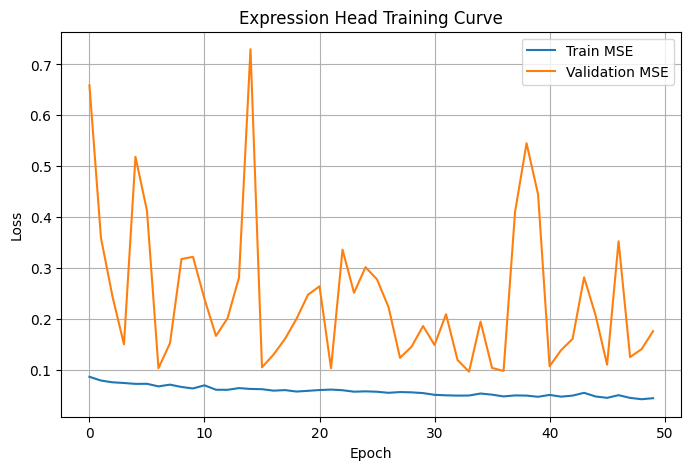

In [24]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Train MSE")
plt.plot(val_losses, label="Validation MSE")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Expression Head Training Curve")
plt.legend()
plt.grid(True)

plt.savefig("loss_curve.png", dpi=300)
plt.show()


In [13]:
help(os.makedirs)

Help on function makedirs in module os:

makedirs(name, mode=511, exist_ok=False)
    makedirs(name [, mode=0o777][, exist_ok=False])
    
    Super-mkdir; create a leaf directory and all intermediate ones.  Works like
    mkdir, except that any intermediate path segment (not just the rightmost)
    will be created if it does not exist. If the target directory already
    exists, raise an OSError if exist_ok is False. Otherwise no exception is
    raised.  This is recursive.

